In [16]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [43]:
retail=pd.read_csv("global_super_store.csv",encoding = "ISO-8859-1")
retail.head()

,Row-ID,Order-ID,Order-Date,Ship-Date,Ship-Mode,Customer-ID,Customer-Name,Segment,City,State,...,Product-ID,Category,Sub-Category,Product-Name,Sales,Quantity,Discount,Profit,Shipping-Cost,Order-Priority
0,32298,CA-2012-124891,July-31-2012,31-07-2012,Same-Day,RH-19495,Rick-Hansen,Consumer,New-York-City,New-York,...,TEC-AC-10003033,Technology,Accessories,Plantronics-CS510---Over-the-Head-monaural-Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,February-5-2013,07-02-2013,Second-Class,JR-16210,Justin-Ritter,Corporate,Wollongong,New-South-Wales,...,FUR-CH-10003950,Furniture,Chairs,Novimex-Executive-Leather-Armchair-Black,3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,October-17-2013,18-10-2013,First-Class,CR-12730,Craig-Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,Nokia-Smart-Phone-with-Caller-ID,5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,January-28-2013,30-01-2013,First-Class,KM-16375,Katherine-Murray,Home-Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,Motorola-Smart-Phone-Cordless,2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,November-5-2013,06-11-2013,Same-Day,RH-9495,Rick-Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,Sharp-Wireless-Fax-High-Speed,2832.960,8,0.0,311.5200,903.04,Critical


In [44]:
retail=retail.drop(['Row-ID','Postal-Code', 'Market','Quantity'], axis=1)
retail.head(2)

,Order-ID,Order-Date,Ship-Date,Ship-Mode,Customer-ID,Customer-Name,Segment,City,State,Country,Region,Product-ID,Category,Sub-Category,Product-Name,Sales,Discount,Profit,Shipping-Cost,Order-Priority
0,CA-2012-124891,July-31-2012,31-07-2012,Same-Day,RH-19495,Rick-Hansen,Consumer,New-York-City,New-York,United-States,East,TEC-AC-10003033,Technology,Accessories,Plantronics-CS510---Over-the-Head-monaural-Wir...,2309.650,0.0,762.1845,933.57,Critical
1,IN-2013-77878,February-5-2013,07-02-2013,Second-Class,JR-16210,Justin-Ritter,Corporate,Wollongong,New-South-Wales,Australia,Oceania,FUR-CH-10003950,Furniture,Chairs,Novimex-Executive-Leather-Armchair-Black,3709.395,0.1,-288.7650,923.63,Critical


In [45]:
retail['Order-Date'] = pd.to_datetime(retail['Order-Date'], format = "%B-%d-%Y")
retail.head()

,Order-ID,Order-Date,Ship-Date,Ship-Mode,Customer-ID,Customer-Name,Segment,City,State,Country,Region,Product-ID,Category,Sub-Category,Product-Name,Sales,Discount,Profit,Shipping-Cost,Order-Priority
0,CA-2012-124891,2012-07-31,31-07-2012,Same-Day,RH-19495,Rick-Hansen,Consumer,New-York-City,New-York,United-States,East,TEC-AC-10003033,Technology,Accessories,Plantronics-CS510---Over-the-Head-monaural-Wir...,2309.650,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2013-02-05,07-02-2013,Second-Class,JR-16210,Justin-Ritter,Corporate,Wollongong,New-South-Wales,Australia,Oceania,FUR-CH-10003950,Furniture,Chairs,Novimex-Executive-Leather-Armchair-Black,3709.395,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,2013-10-17,18-10-2013,First-Class,CR-12730,Craig-Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,TEC-PH-10004664,Technology,Phones,Nokia-Smart-Phone-with-Caller-ID,5175.171,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,2013-01-28,30-01-2013,First-Class,KM-16375,Katherine-Murray,Home-Office,Berlin,Berlin,Germany,Central,TEC-PH-10004583,Technology,Phones,Motorola-Smart-Phone-Cordless,2892.510,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,2013-11-05,06-11-2013,Same-Day,RH-9495,Rick-Hansen,Consumer,Dakar,Dakar,Senegal,Africa,TEC-SHA-10000501,Technology,Copiers,Sharp-Wireless-Fax-High-Speed,2832.960,0.0,311.5200,903.04,Critical


In [46]:
retail['year']=retail['Order-Date'].dt.year

In [47]:
retail['month']=retail['Order-Date'].dt.month
retail['day']=retail['Order-Date'].dt.day

In [48]:
retail['Sub-Category'].unique()

array(['Accessories', 'Chairs', 'Phones', 'Copiers', 'Tables', 'Binders',
       'Supplies', 'Appliances', 'Machines', 'Bookcases', 'Storage',
       'Furnishings', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Labels'],
      dtype=object)

In [49]:
retail.groupby('Sub-Category')['Sales'].mean()

Sub-Category
Accessories    243.654315
Appliances     576.105017
Art             76.201508
Binders         75.083145
Bookcases      608.283800
Chairs         437.298126
Copiers        679.008670
Envelopes       70.186571
Fasteners       34.397651
Furnishings    121.633519
Labels          28.167318
Machines       524.266532
Paper           69.047970
Phones         508.437337
Storage        222.788271
Supplies       100.236792
Tables         879.258913
Name: Sales, dtype: float64

In [54]:
Phones=retail[retail['Sub-Category']=='Phones']
Phones.head()

,Order-ID,Order-Date,Ship-Date,Ship-Mode,Customer-ID,Customer-Name,Segment,City,State,Country,...,Sub-Category,Product-Name,Sales,Discount,Profit,Shipping-Cost,Order-Priority,year,month,day
2,IN-2013-71249,2013-10-17,18-10-2013,First-Class,CR-12730,Craig-Reiter,Consumer,Brisbane,Queensland,Australia,...,Phones,Nokia-Smart-Phone-with-Caller-ID,5175.171,0.1,919.971,915.49,Medium,2013,10,17
3,ES-2013-1579342,2013-01-28,30-01-2013,First-Class,KM-16375,Katherine-Murray,Home-Office,Berlin,Berlin,Germany,...,Phones,Motorola-Smart-Phone-Cordless,2892.510,0.1,-96.540,910.16,Medium,2013,1,28
5,IN-2013-42360,2013-06-28,01-07-2013,Second-Class,JM-15655,Jim-Mitchum,Corporate,Sydney,New-South-Wales,Australia,...,Phones,Samsung-Smart-Phone-with-Caller-ID,2862.675,0.1,763.275,897.35,Critical,2013,6,28
12,SA-2011-1830,2011-12-27,29-12-2011,Second-Class,MM-7260,Magdelene-Morse,Consumer,Jizan,Jizan,Saudi-Arabia,...,Phones,Cisco-Smart-Phone-with-Caller-ID,2616.960,0.0,1151.400,832.41,Critical,2011,12,27
21,CA-2011-154627,2011-10-29,31-10-2011,First-Class,SA-20830,Sue-Ann-Reed,Consumer,Chicago,Illinois,United-States,...,Phones,Apple-iPhone-5S,2735.952,0.2,341.994,752.51,High,2011,10,29


In [55]:
Phones['Order-Date'].min(), Phones['Order-Date'].max()

(Timestamp('2011-01-03 00:00:00'), Timestamp('2014-12-31 00:00:00'))

We have 4years Phones data

In [56]:
Phones.isnull().sum()

Order-ID          0
Order-Date        0
Ship-Date         0
Ship-Mode         0
Customer-ID       0
Customer-Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Product-ID        0
Category          0
Sub-Category      0
Product-Name      0
Sales             0
Discount          0
Profit            0
Shipping-Cost     0
Order-Priority    0
year              0
month             0
day               0
dtype: int64

In [57]:
Phones= Phones.drop(['Postal-Code','Sub-Category','Customer-Name'], axis=1)

KeyError: "['Postal-Code'] not found in axis"

In [58]:
Phones = Phones.groupby('Order-Date')['Sales'].sum().reset_index()
Phones.head()

,Order-Date,Sales
0,2011-01-03,195.2000
1,2011-01-07,1147.9400
2,2011-01-09,363.4902
3,2011-01-10,2875.0950
4,2011-01-11,798.8736


# Indexing with Time Series Data

In [59]:
Phones = Phones.set_index('Order-Date')
Phones.index

DatetimeIndex(['2011-01-03', '2011-01-07', '2011-01-09', '2011-01-10',
               '2011-01-11', '2011-01-14', '2011-01-17', '2011-01-21',
               '2011-01-22', '2011-01-24',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order-Date', length=1134, freq=None)

In [73]:
# Semi monthly Sales
y = Phones['Sales'].resample('MS').mean()

In [74]:
#2014 Sales Data
y['2014':]

Order-Date
2014-01-01    1105.871324
2014-02-01    1073.256736
2014-03-01    1021.834288
2014-04-01    1217.098868
2014-05-01    1273.510400
2014-06-01    2068.006331
2014-07-01    1380.399739
2014-08-01    2623.170761
2014-09-01    1852.690244
2014-10-01    1785.125063
2014-11-01    2998.974450
2014-12-01    2567.721664
Freq: MS, Name: Sales, dtype: float64

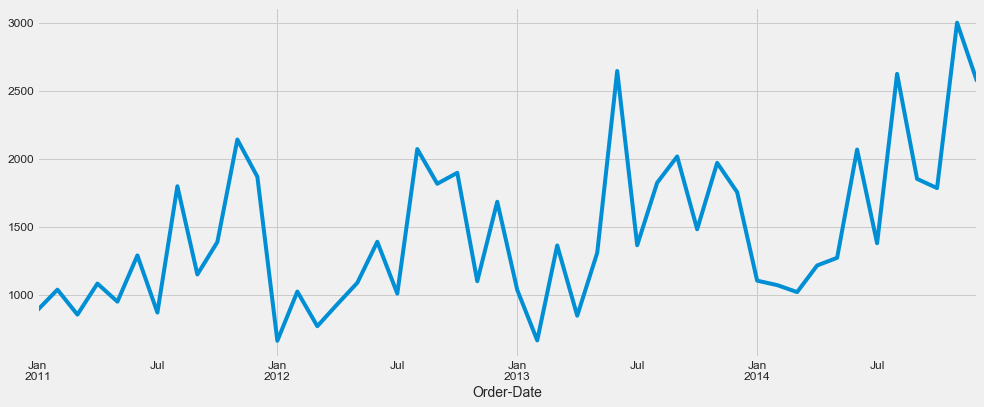

In [75]:
#Visualizing Mobile Sales Time Series Data
y.plot(figsize=(15, 6))
plt.show()

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

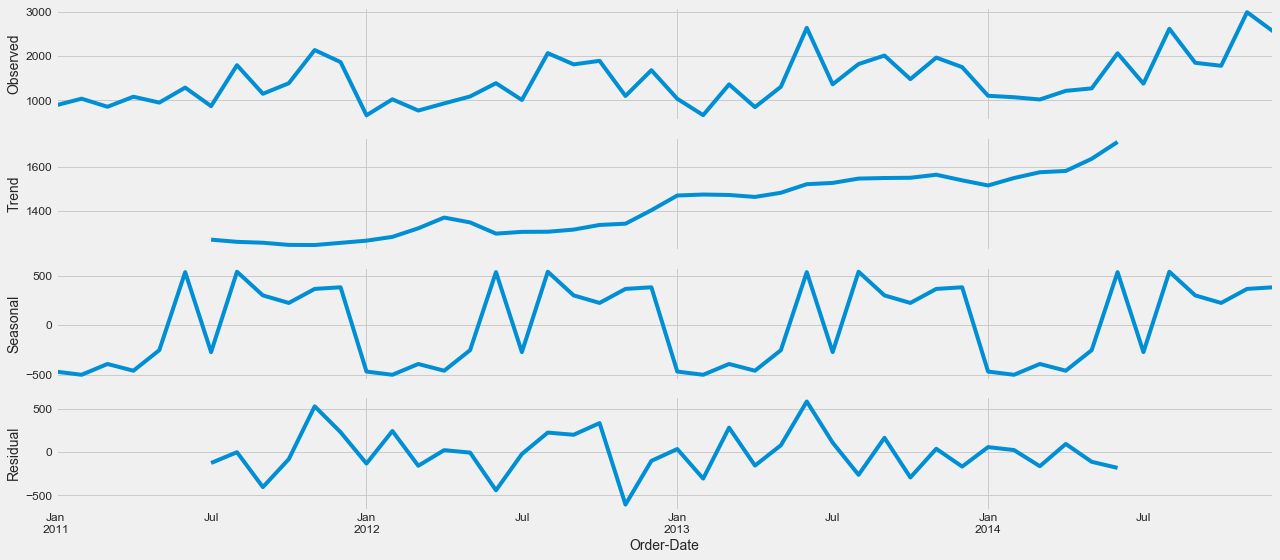

In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

# Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.
ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [78]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [79]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:827.285096983433
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1432.9984364902566
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:535.7536129827962
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:550.3383166774382
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1371.2400883441803
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:371.3605649020509
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:777.3068456574018
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2837.413257225301
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:523.1801609127721
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:552.2495873450035
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4706.475461387898
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:371.98083427679524
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:723.8499829221083
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1368.6530658821343
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:540.7052442138315
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:547.5403112635003
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1429.7403295051417
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:364.7843239900064
ARIMA(

In [80]:
results.aic.min()

340.14167346700157

The above output suggests that SARIMA(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 340.14. Therefore we should consider this to be optimal option.

# Fitting the ARIMA model

In [82]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

In [83]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0219      0.277      0.079      0.937      -0.521       0.565
ma.L1         -1.0001      0.324     -3.084      0.002      -1.636      -0.364
ar.S.L12      -0.4277      0.271     -1.576      0.115      -0.960       0.104
sigma2      1.963e+05   1.65e-06   1.19e+11      0.000    1.96e+05    1.96e+05


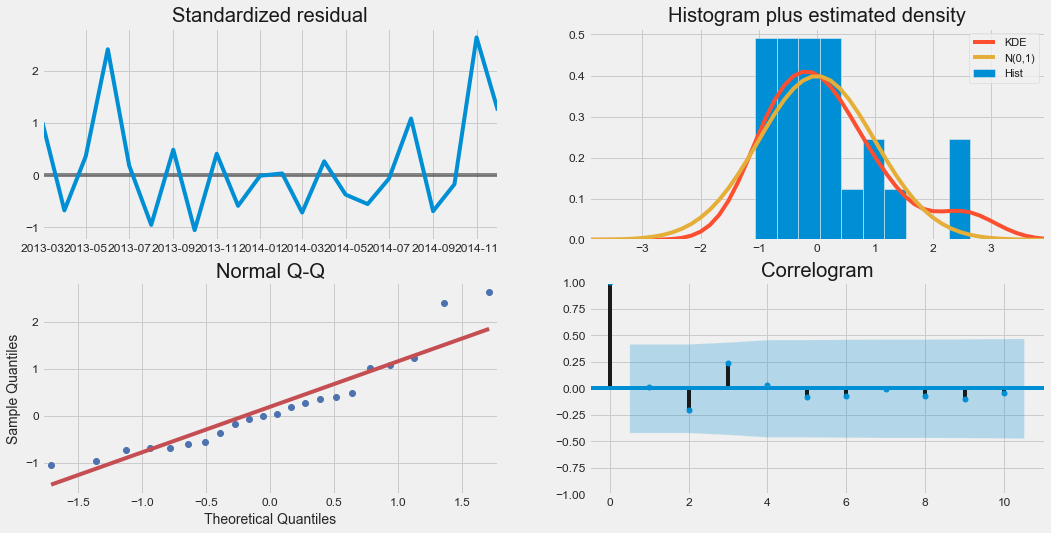

In [84]:
#We should always run model diagnostics to investigate any unusual behavior.

results.plot_diagnostics(figsize=(16, 8))
plt.show()

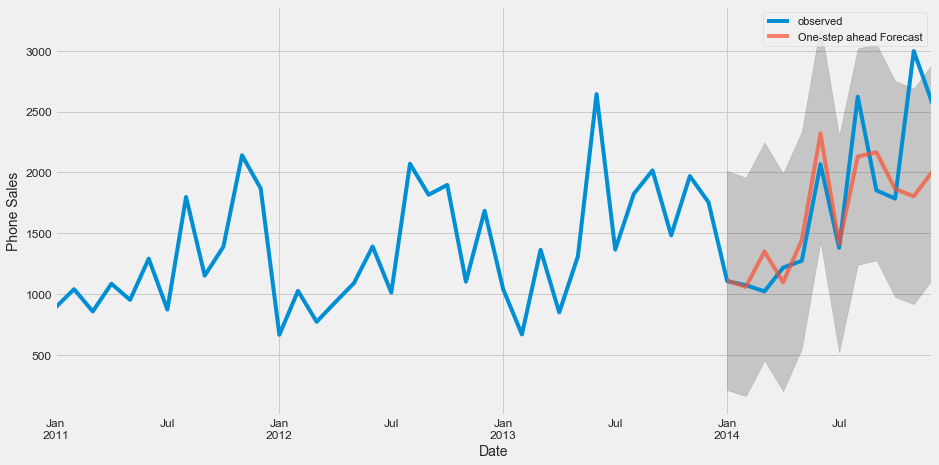

In [85]:
#Validating forecasts

pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Phone Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [86]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 192177.24


In [87]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 438.38
